In [1]:
import requests
import pandas as pd
import json
from geopy import distance
import matplotlib.pyplot as plt
import numpy as np
import statistics
import scipy.stats as stats

geo_2010 = pd.read_csv("2015_50_Mile_Area_Data.csv")
geo_2010 = geo_2010.drop(labels = ['Unnamed: 0'],axis =1)

In [2]:
geo_2010.dtypes

Year                                                 int64
State                                               object
County                                              object
Number Unemployed                                  float64
Percent Unemployed                                 float64
Number of Crimes                                     int64
Total Labor Force                                  float64
Coordinates                                         object
Crimes per Capita                                  float64
Number Unemployed for Area Counties (50 Miles)      object
Unemployed Percent for Area Counties (50 Miles)     object
Number of Crimes for Area Counties (50 Miles)       object
Crime Percent for Area Counties (50 Miles)          object
Coordinates for Area Counties (50 Miles)            object
Total Area Counties (50 Miles)                       int64
Highest Unemployment in Area (50 Miles)               bool
Lowest Unemployment in Area (50 Miles)                bo

In [3]:

x=0
for header in geo_2010:
    print(header,x)
    x += 1


Year 0
State 1
County 2
Number Unemployed 3
Percent Unemployed 4
Number of Crimes 5
Total Labor Force 6
Coordinates 7
Crimes per Capita 8
Number Unemployed for Area Counties (50 Miles) 9
Unemployed Percent for Area Counties (50 Miles) 10
Number of Crimes for Area Counties (50 Miles) 11
Crime Percent for Area Counties (50 Miles) 12
Coordinates for Area Counties (50 Miles) 13
Total Area Counties (50 Miles) 14
Highest Unemployment in Area (50 Miles) 15
Lowest Unemployment in Area (50 Miles) 16
Highest Crime Rate in Area (50 Miles) 17
Lowest Crime Rate in Area (50 Miles) 18


In [4]:
average_crime_rate = []
average_unemployment_rate = []
for index in range(len(geo_2010["Year"])):
    average_crime_rate.append(statistics.mean(eval(geo_2010.iloc[index,12])))
    average_unemployment_rate.append(statistics.mean(eval(geo_2010.iloc[index,10])))
geo_2010["Average Crime Rate (50 Miles)"] = average_crime_rate
geo_2010["Average Unemployment Rate (50 Miles)"] = average_unemployment_rate
geo_2010.head()

,Year,State,County,Number Unemployed,Percent Unemployed,Number of Crimes,Total Labor Force,Coordinates,Crimes per Capita,Number Unemployed for Area Counties (50 Miles),...,Number of Crimes for Area Counties (50 Miles),Crime Percent for Area Counties (50 Miles),Coordinates for Area Counties (50 Miles),Total Area Counties (50 Miles),Highest Unemployment in Area (50 Miles),Lowest Unemployment in Area (50 Miles),Highest Crime Rate in Area (50 Miles),Lowest Crime Rate in Area (50 Miles),Average Crime Rate (50 Miles),Average Unemployment Rate (50 Miles)
0,2015,AL,Lee,3719.08333,5.25000,6934,70858.83333,"(32.5888702, -85.39627689999999)",0.09786,"[3719.08333, 641.08333, 1845.83333, 379.08333,...",...,"[6934, 1475, 3396, 472, 880, 2597, 706, 2472, ...","[0.09786, 0.18513, 0.09243, 0.09881, 0.03651, ...","['(32.5888702, -85.39627689999999)', '(32.3731...",13,False,False,False,False,0.109534,6.514102
1,2015,AL,Bibb,567.33333,6.62500,385,8572.33333,"(32.9562798, -87.14228949999999)",0.04491,"[567.33333, 470.33333, 347.5, 1494.66667, 318....",...,"[385, 88, 110, 3629, 302, 5516, 841, 2647, 260...","[0.04491, 0.01455, 0.03157, 0.2328, 0.10495, 0...","['(32.9562798, -87.14228949999999)', '(32.7859...",10,False,False,False,False,0.088753,7.127499
2,2015,AL,Clay,340.16667,6.12500,273,5548.25000,"(33.279527, -85.84862360000001)",0.04920,"[340.16667, 295.75, 4555.41667, 3231.41667, 90...",...,"[273, 400, 5516, 7579, 2597, 365, 706, 6979, 2...","[0.0492, 0.09039, 0.05098, 0.16508, 0.17343, 0...","['(33.279527, -85.84862360000001)', '(32.88977...",12,False,False,False,True,0.112503,6.158331
3,2015,AL,Dale,1261.66667,6.35833,2641,19836.50000,"(31.4645298, -85.684578)",0.13314,"[1261.66667, 983.16667, 456.41667, 1207.0, 637...",...,"[2641, 2528, 740, 812, 1339, 1343, 472, 1643, ...","[0.13314, 0.16922, 0.11019, 0.04006, 0.12415, ...","['(31.4645298, -85.684578)', '(31.8395163, -86...",13,False,False,False,False,0.108374,6.750640
4,2015,AL,Hale,470.33333,7.78333,88,6047.58333,"(32.7859102, -87.6186379)",0.01455,"[567.33333, 470.33333, 347.5, 1494.66667, 318....",...,"[385, 88, 110, 3629, 302, 351, 1190, 238, 15115]","[0.04491, 0.01455, 0.03157, 0.2328, 0.10495, 0...","['(32.9562798, -87.14228949999999)', '(32.7859...",9,False,False,False,True,0.093422,8.098148


In [5]:
def chi_square_unemployment(df):
    ddof = len(df["Average Crime Rate (50 Miles)"])-1
    statistic, pvalue = stats.chisquare(df["Crimes per Capita"],df["Average Crime Rate (50 Miles)"],ddof =ddof)
    crit_value = stats.chi2.ppf(q = 0.99,df = ddof)
    x = df["Average Crime Rate (50 Miles)"]
    y = df["Crimes per Capita"]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    return statistic,crit_value,slope

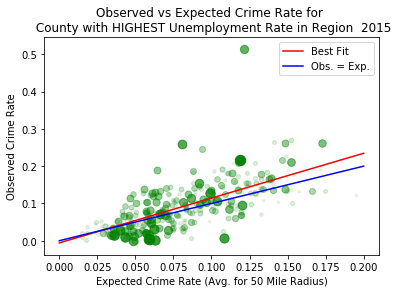

In [6]:
def plot_unemployment(df,title_name):
    max_alpha = df["Total Area Counties (50 Miles)"].max()
    for index in range(len(df["State"])):
        plt.scatter(df.iloc[index,19], df.iloc[index,8],df.iloc[index,14]*4, c="green", marker="o", alpha= df.iloc[index,14]/max_alpha)
    x = df["Average Crime Rate (50 Miles)"]
    y = df["Crimes per Capita"]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    plt.plot([0,.2],[0*slope+intercept,.2*slope+intercept],c="red")    
    plt.xlabel("Expected Crime Rate (Avg. for 50 Mile Radius)")
    plt.ylabel("Observed Crime Rate")
    plt.plot([0,.2],[0,0.2],c="blue")
    plt.legend(labels=["Best Fit","Obs. = Exp."])
    plt.title(f"Observed vs Expected Crime Rate for \n County with {title_name} Unemployment Rate in Region  2015")
        
highest_unemployment_df = geo_2010[geo_2010["Highest Unemployment in Area (50 Miles)"]==True]
highest_unemployment_df = highest_unemployment_df[highest_unemployment_df["Total Area Counties (50 Miles)"]>1]        

highest_unemployment_df.to_csv("Highest_Unemployment_Counites.csv",index=False)

plot_unemployment(highest_unemployment_df,"HIGHEST")
plt.savefig("HighestUnemployment2015.png")

In [7]:
chi_square_unemployment(highest_unemployment_df)

(7.521769891303561, 353.3335066657442, 1.201966283397783)

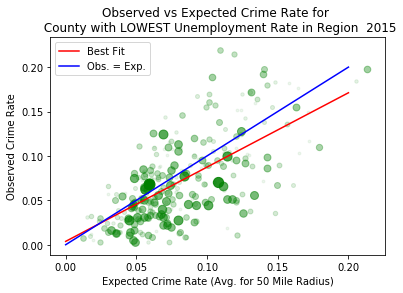

In [8]:
lowest_unemployment_df = geo_2010[geo_2010["Lowest Unemployment in Area (50 Miles)"]==True]
lowest_unemployment_df = lowest_unemployment_df[lowest_unemployment_df["Total Area Counties (50 Miles)"]>1]        
plot_unemployment(lowest_unemployment_df,"LOWEST")
plt.savefig("LowestUnemployment2015.png")

In [9]:
chi_square_unemployment(lowest_unemployment_df)

(4.407861736360092, 336.87507113486214, 0.8367931845585345)

In [10]:
def chi_square_crime(df):
    ddof = len(df["Percent Unemployed"])-1
    statistic, pvalue = stats.chisquare(df["Percent Unemployed"],df["Average Unemployment Rate (50 Miles)"],ddof =ddof)
    crit_value = stats.chi2.ppf(q = 0.99,df = ddof)
    x = df["Average Unemployment Rate (50 Miles)"]
    y = df["Percent Unemployed"]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    return statistic,pvalue,crit_value,slope

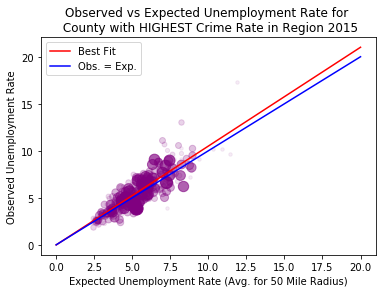

In [11]:
def plot_crime(df,title_name):
    marker = "o"
    max_alpha = df["Total Area Counties (50 Miles)"].max()
    for index in range(len(df["State"])):
        plt.scatter(df.iloc[index,20], df.iloc[index,4],df.iloc[index,14]*6, c="purple", marker="o", alpha= df.iloc[index,14]/max_alpha)
    x = df["Average Unemployment Rate (50 Miles)"]
    y = df["Percent Unemployed"]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    plt.plot([0,20],[0*slope+intercept,20*slope+intercept],c="red")     
    plt.xlabel("Expected Unemployment Rate (Avg. for 50 Mile Radius)")
    plt.ylabel("Observed Unemployment Rate")
    plt.plot([0,20],[0,20],c="blue")
    plt.legend(labels=["Best Fit","Obs. = Exp."])
    plt.title(f"Observed vs Expected Unemployment Rate for \n County with {title_name} Crime Rate in Region 2015")

highest_crime_rate_df = geo_2010[geo_2010["Highest Crime Rate in Area (50 Miles)"]==True]
highest_crime_rate_df = highest_crime_rate_df[highest_crime_rate_df["Total Area Counties (50 Miles)"]>1]
plot_crime(highest_crime_rate_df,"HIGHEST")
plt.savefig("HighestCrimeRate2015.png")

In [12]:
chi_square_crime(highest_crime_rate_df)

(59.44426421456525, nan, 378.4992626759586, 1.0509712001933613)

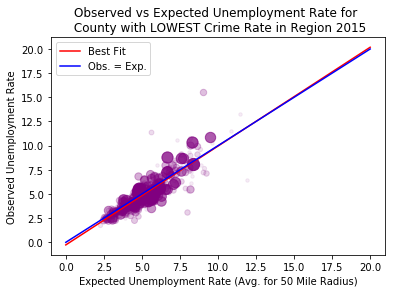

In [13]:
lowest_crime_rate_df = geo_2010[geo_2010["Lowest Crime Rate in Area (50 Miles)"]==True]
lowest_crime_rate_df = lowest_crime_rate_df[lowest_crime_rate_df["Total Area Counties (50 Miles)"]>1]
plot_crime(lowest_crime_rate_df,"LOWEST")
plt.savefig("LowestCrimeRate2015.png")

In [14]:
chi_square_crime(lowest_crime_rate_df)

(55.74177526807762, nan, 353.3335066657442, 1.0224949107532204)